In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/p_arrivalDN_forlstm.csv")
df

,Departure,Bagbazar,Shyambazar\n,Khanna Cinema,HUDCO,Beliaghata XING,Metroplitan,Science City,VIP Bazaar,Ruby hospital,Kalikapur,Ajaynagar,Peerless,Patuli P.S.,Garia,Time,Date
0,12-09-2021 06:00:00,6,16,14,16,24,6,10,14,14,6,6,4,8,0,06:00:00,12-09-2021
1,12-09-2021 06:19:00,6,16,14,16,24,6,10,14,14,6,6,4,8,0,06:19:00,12-09-2021
2,12-09-2021 06:38:00,6,16,14,16,24,6,10,14,14,6,6,4,8,0,06:38:00,12-09-2021
3,12-09-2021 06:54:00,8,28,24,28,32,10,24,26,27,11,18,9,17,0,06:54:00,12-09-2021
4,12-09-2021 07:06:00,6,29,24,27,28,9,20,22,22,9,14,7,12,0,07:06:00,12-09-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,12-09-2021 20:21:00,9,9,8,19,15,7,11,10,4,2,7,2,3,0,20:21:00,12-09-2021
114,12-09-2021 20:33:00,10,8,7,17,15,7,12,15,7,8,8,2,5,0,20:33:00,12-09-2021
115,12-09-2021 20:45:00,10,10,9,22,19,9,16,21,10,11,17,5,12,0,20:45:00,12-09-2021
116,12-09-2021 20:57:00,10,10,9,21,18,9,15,18,9,9,13,4,8,0,20:57:00,12-09-2021


In [3]:
df.drop(['Time',	'Date'], axis=1, inplace=True)

In [4]:
df['Departure'].dtype

dtype('O')

In [5]:
df['Departure']=pd.to_datetime(df['Departure'],infer_datetime_format=True )
indexedDataset=df.set_index(['Departure'])
indexedDataset

,Bagbazar,Shyambazar\n,Khanna Cinema,HUDCO,Beliaghata XING,Metroplitan,Science City,VIP Bazaar,Ruby hospital,Kalikapur,Ajaynagar,Peerless,Patuli P.S.,Garia
Departure,,,,,,,,,,,,,,
2021-12-09 06:00:00,6,16,14,16,24,6,10,14,14,6,6,4,8,0
2021-12-09 06:19:00,6,16,14,16,24,6,10,14,14,6,6,4,8,0
2021-12-09 06:38:00,6,16,14,16,24,6,10,14,14,6,6,4,8,0
2021-12-09 06:54:00,8,28,24,28,32,10,24,26,27,11,18,9,17,0
2021-12-09 07:06:00,6,29,24,27,28,9,20,22,22,9,14,7,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09 20:21:00,9,9,8,19,15,7,11,10,4,2,7,2,3,0
2021-12-09 20:33:00,10,8,7,17,15,7,12,15,7,8,8,2,5,0
2021-12-09 20:45:00,10,10,9,22,19,9,16,21,10,11,17,5,12,0


In [6]:
df['Departure'].dtype

dtype('<M8[ns]')

In [7]:
df3=indexedDataset.resample("10T").sum()
df3

,Bagbazar,Shyambazar\n,Khanna Cinema,HUDCO,Beliaghata XING,Metroplitan,Science City,VIP Bazaar,Ruby hospital,Kalikapur,Ajaynagar,Peerless,Patuli P.S.,Garia
Departure,,,,,,,,,,,,,,
2021-12-09 06:00:00,6,16,14,16,24,6,10,14,14,6,6,4,8,0
2021-12-09 06:10:00,6,16,14,16,24,6,10,14,14,6,6,4,8,0
2021-12-09 06:20:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-12-09 06:30:00,6,16,14,16,24,6,10,14,14,6,6,4,8,0
2021-12-09 06:40:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09 20:20:00,9,9,8,19,15,7,11,10,4,2,7,2,3,0
2021-12-09 20:30:00,10,8,7,17,15,7,12,15,7,8,8,2,5,0
2021-12-09 20:40:00,10,10,9,22,19,9,16,21,10,11,17,5,12,0


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [9]:
def lstm_preprocessing(df3):
  df3=np.array(df3).reshape(-1,1)
  plt.plot(df3)

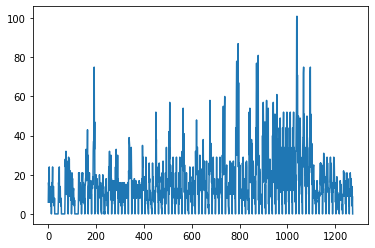

In [10]:
KhannaCinema=np.array(df3).reshape(-1,1)
plt.plot(KhannaCinema)

In [11]:
scaler= MinMaxScaler()
data=scaler.fit_transform(KhannaCinema)

In [12]:
len(KhannaCinema)

1274

In [13]:
train_size=round(0.77*len(KhannaCinema))
test_size=round(0.23*len(KhannaCinema))

In [14]:
train=KhannaCinema[0:train_size]
test=KhannaCinema[train_size:,:]

In [15]:
train.shape

(981, 1)

In [16]:
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
look_back = 1
X_train, y_train = get_data(train, look_back)
X_train.shape

(979, 1)

In [18]:
X_test, y_test = get_data(test, look_back)

In [19]:
X_train.shape

(979, 1)

In [20]:
type(y_test)

numpy.ndarray

In [21]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
979/979 [==============================] - 4s 2ms/step - loss: 370.3896
Epoch 2/100
979/979 [==============================] - 2s 2ms/step - loss: 269.2413
Epoch 3/100
979/979 [==============================] - 2s 2ms/step - loss: 209.3651
Epoch 4/100
979/979 [==============================] - 2s 2ms/step - loss: 185.6891
Epoch 5/100
979/979 [==============================] - 2s 2ms/step - loss: 172.2505
Epoch 6/100
979/979 [==============================] - 2s 2ms/step - loss: 164.0074
Epoch 7/100
979/979 [==============================] - 2s 2ms/step - loss: 158.6092
Epoch 8/100
979/979 [==============================] - 2s 2ms/step - loss: 154.7364
Epoch 9/100
979/979 [==============================] - 2s 2ms/step - loss: 151.8576
Epoch 10/100
979/979 [==============================] - 2s 2ms/step - loss: 149.3269
Epoch 11/100
979/979 [==============================] - 2s 2ms/step - loss: 147.4700
Epoch 12/100
979/979 [==============================] - 2s 2ms/step - loss

In [24]:
y_pred = model.predict(X_test)

In [25]:
scaler.scale_

array([0.00990099])

In [26]:
y_pred = scaler.inverse_transform(y_pred)

In [27]:
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

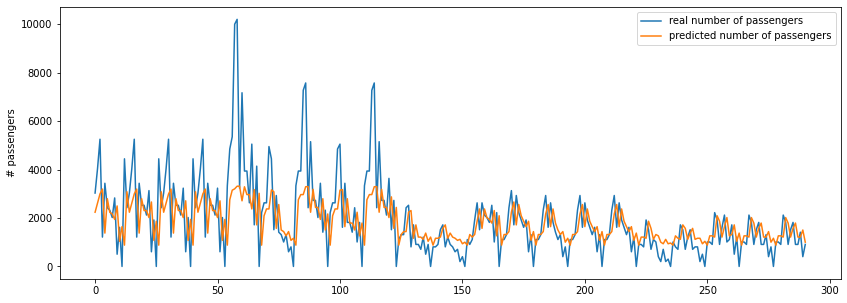

In [28]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

1881664.1135411698

In [34]:
np.sqrt(mse)

1371.737625619845